<a href="https://colab.research.google.com/github/jpgill86/JG20-analysis/blob/master/PSP_Analysis_(Shlomit_Tam_data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
!pip install -q tdms2axg elephant
!pip install -q git+https://github.com/jpgill86/python-neo@fix/axographrawio
# ignore error about elephant requirement for neo

ERROR: elephant 0.7.0 has requirement neo<0.9.0,>=0.8.0, but you'll have neo 0.9.0.dev0 which is incompatible.


In [0]:
import numpy as np
from tdms2axg import tdms2axg
import quantities as pq
import neo
import elephant
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/elephant/pandas_bridge.py:22: DeprecationWarning: pandas_bridge module will be removed in Elephant v0.8.x
  DeprecationWarning)


In [0]:
tdms_file = '/gdrive/Shared drives/LFI-neural-correlates/Shlomit Tam data/06052015_145449/Voltage.tdms'
axgx_file = tdms2axg(tdms_file, force=True, verbose=False)

In [0]:
blk = neo.AxographIO(axgx_file).read_block()
sigs = blk.segments[0].analogsignals

# fix missing units (not in TDMS file)
sigs = [sig*pq.V for sig in sigs]

# better names
sigs[0].name = 'Pre'
sigs[1].name = 'Post'

# filtered sigs
lowpass_freqs = [None, 30]  # Hz
sigs_filtered = [elephant.signal_processing.butter(sig, lowpass_freq=lowpass_freq*pq.Hz) if lowpass_freq else None for sig, lowpass_freq in zip(sigs, lowpass_freqs)]

End of file reached unexpectedly while parsing metadata, will attempt to continue
the default signal_group_mode will change from 'split-all' to 'group-by-same-units' in next release


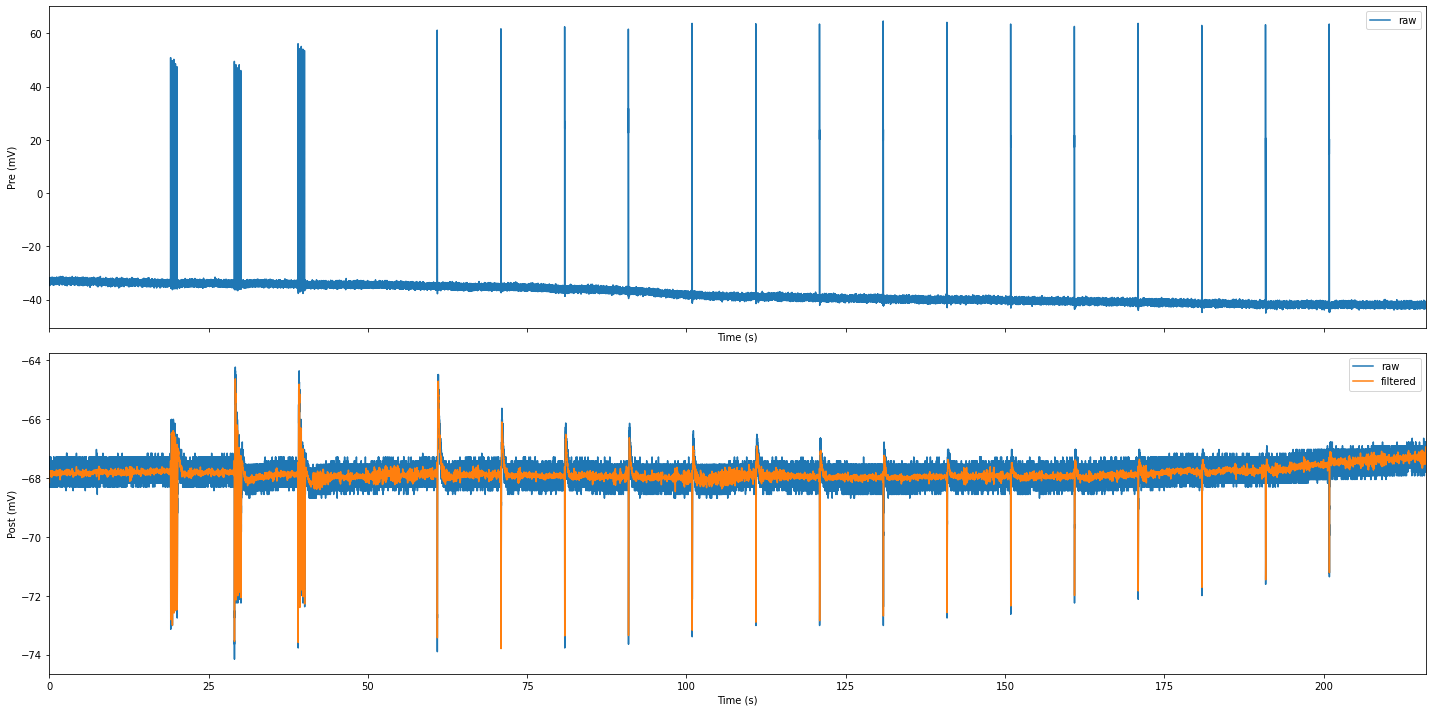

In [0]:
fig, axes = plt.subplots(len(sigs), 1, sharex=True, figsize=(20,10))
for i, (sig, sig_filtered) in enumerate(zip(sigs, sigs_filtered)):
    ax = axes[i]

    # plot raw
    ax.plot(sig.times, sig.rescale('mV').magnitude, label='raw')

    # plot smoothed
    if sig_filtered is not None: ax.plot(sig_filtered.times, sig_filtered.rescale('mV').magnitude, label='filtered')

    ax.set_xlabel('Time (s)')
    ax.set_ylabel(f'{sig.name} (mV)')
    ax.set_xmargin(0)
    ax.legend()

plt.tight_layout()

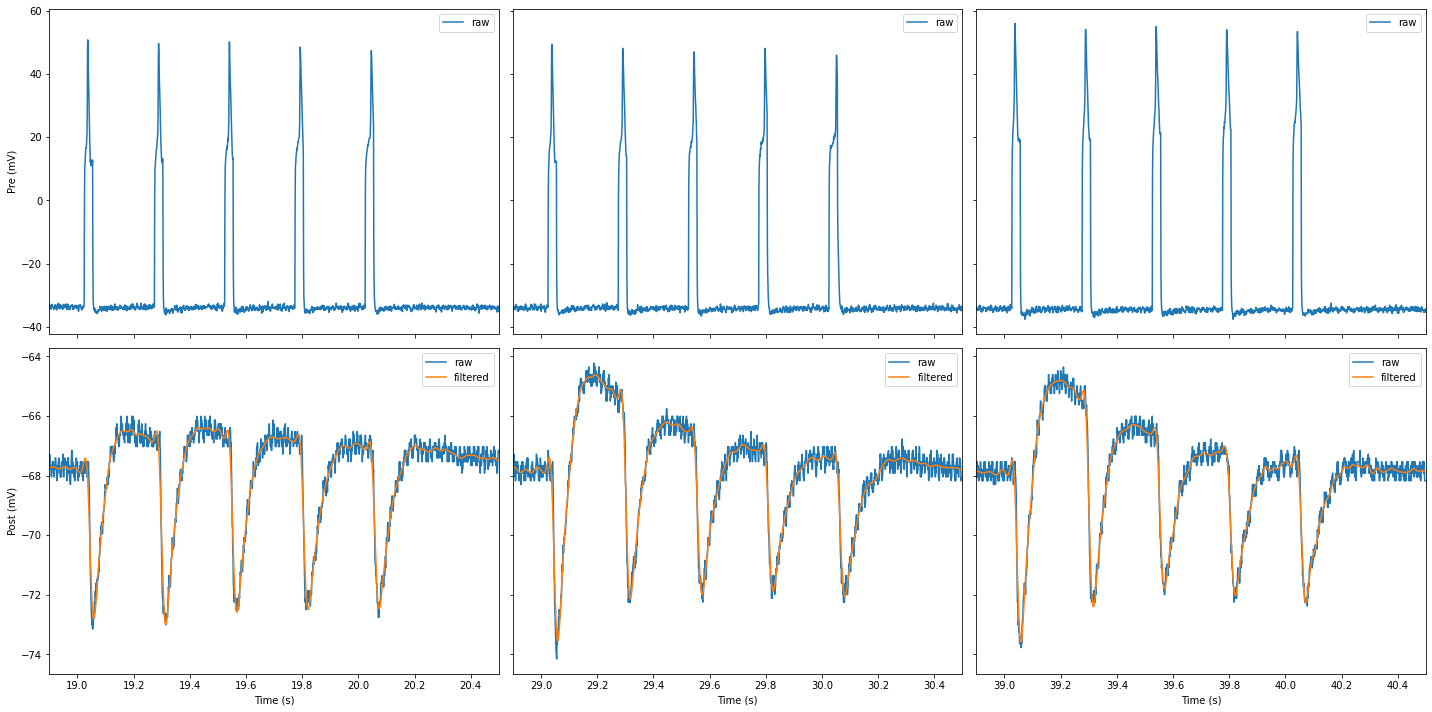

In [0]:
xlims = [
        [18.9, 20.5],  # first train
        [28.9, 30.5],  # second train
        [38.9, 40.5],  # third train
    ]

fig, axes = plt.subplots(len(sigs), len(xlims), squeeze=False, sharex='col', sharey='row', figsize=(20,10))
for i, (sig, sig_filtered) in enumerate(zip(sigs, sigs_filtered)):
    for j, xlim in enumerate(xlims):
        ax = axes[i][j]

        # plot raw
        ax.plot(sig.time_slice(xlim[0]*pq.s, xlim[1]*pq.s).times, sig.time_slice(xlim[0]*pq.s, xlim[1]*pq.s).rescale('mV').magnitude, label='raw')

        # plot smoothed
        if sig_filtered is not None: ax.plot(sig_filtered.time_slice(xlim[0]*pq.s, xlim[1]*pq.s).times, sig_filtered.time_slice(xlim[0]*pq.s, xlim[1]*pq.s).rescale('mV').magnitude, label='filtered')

        if i==len(sigs)-1: ax.set_xlabel('Time (s)')
        if j==0: ax.set_ylabel(f'{sig.name} (mV)')
        ax.set_xmargin(0)
        ax.legend()

plt.tight_layout()

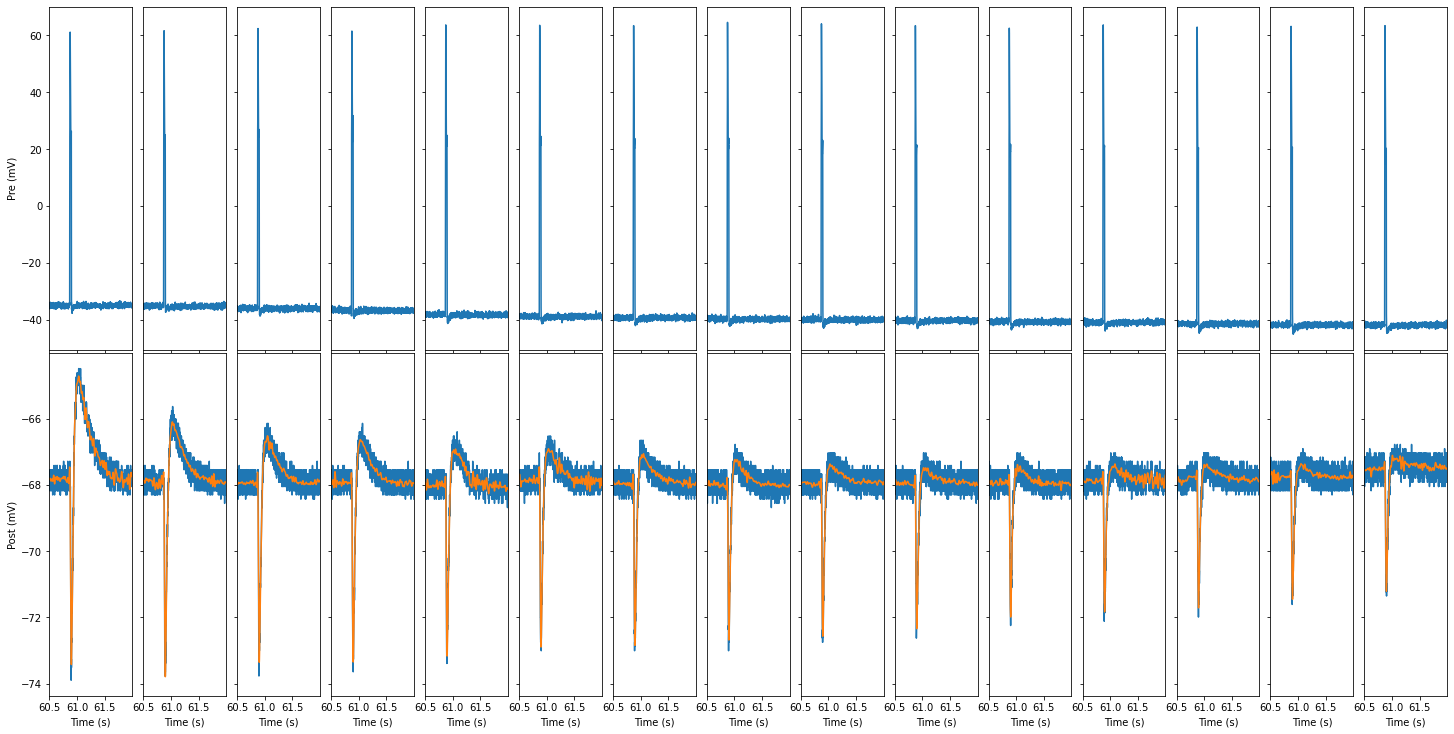

In [0]:
xlims = [
        [60.5, 62],
        [70.5, 72],
        [80.5, 82],
        [90.5, 92],
        [100.5, 102],
        [110.5, 112],
        [120.5, 122],
        [130.5, 132],
        [140.5, 142],
        [150.5, 152],
        [160.5, 162],
        [170.5, 172],
        [180.5, 182],
        [190.5, 192],
        [200.5, 202],
    ]

fig, axes = plt.subplots(len(sigs), len(xlims), squeeze=False, sharex='col', sharey='row', figsize=(20,10))
for i, (sig, sig_filtered) in enumerate(zip(sigs, sigs_filtered)):
    for j, xlim in enumerate(xlims):
        ax = axes[i][j]

        # plot raw
        ax.plot(sig.time_slice(xlim[0]*pq.s, xlim[1]*pq.s).times - 10*pq.s*j, sig.time_slice(xlim[0]*pq.s, xlim[1]*pq.s).rescale('mV').magnitude, label='raw')

        # plot smoothed
        if sig_filtered is not None: ax.plot(sig_filtered.time_slice(xlim[0]*pq.s, xlim[1]*pq.s).times - 10*pq.s*j, sig_filtered.time_slice(xlim[0]*pq.s, xlim[1]*pq.s).rescale('mV').magnitude, label='filtered')

        if i==len(sigs)-1: ax.set_xlabel('Time (s)')
        if j==0: ax.set_ylabel(f'{sig.name} (mV)')
        ax.set_xmargin(0)
        # ax.legend()

plt.tight_layout(pad=0)

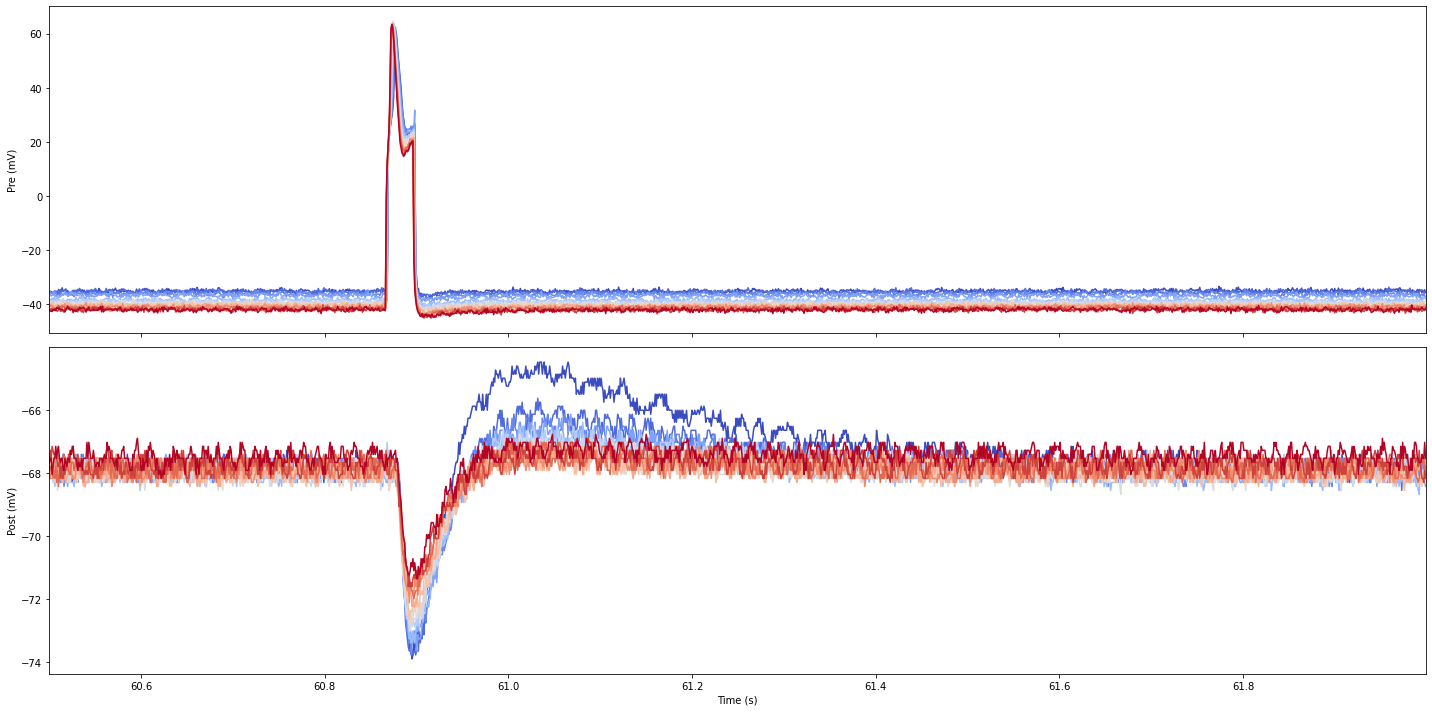

In [0]:
xlims = [
        [60.5, 62],
        [70.5, 72],
        [80.5, 82],
        [90.5, 92],
        [100.5, 102],
        [110.5, 112],
        [120.5, 122],
        [130.5, 132],
        [140.5, 142],
        [150.5, 152],
        [160.5, 162],
        [170.5, 172],
        [180.5, 182],
        [190.5, 192],
        [200.5, 202],
    ]

colors = plt.get_cmap('coolwarm')(np.linspace(0, 1, len(xlims)))

# fig, axes = plt.subplots(len(sigs), len(xlims), squeeze=False, sharex='col', sharey='row', figsize=(20,10))
# for i, (sig, sig_filtered) in enumerate(zip(sigs, sigs_filtered)):
#     for j, xlim in enumerate(xlims):
#         ax = axes[i][j]
fig, axes = plt.subplots(len(sigs), 1, squeeze=False, sharex='col', sharey='row', figsize=(20,10))
for i, (sig, sig_filtered) in enumerate(zip(sigs, sigs_filtered)):
    for j, xlim in enumerate(xlims):
        ax = axes[i][0]

        # plot raw
        ax.plot(sig.time_slice(xlim[0]*pq.s, xlim[1]*pq.s).times - 10*pq.s*j, sig.time_slice(xlim[0]*pq.s, xlim[1]*pq.s).rescale('mV').magnitude, label='raw', color=colors[j])

        # plot smoothed
        # if sig_filtered is not None: ax.plot(sig_filtered.time_slice(xlim[0]*pq.s, xlim[1]*pq.s).times - 10*pq.s*j, sig_filtered.time_slice(xlim[0]*pq.s, xlim[1]*pq.s).rescale('mV').magnitude, label='filtered', color=colors[j])

        if i==len(sigs)-1: ax.set_xlabel('Time (s)')
        if j==0: ax.set_ylabel(f'{sig.name} (mV)')
        ax.set_xmargin(0)
        # ax.legend()

plt.tight_layout()